
### About this file
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index: measures the change in prices paid by consumers for goods and services

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the dataset

In [2]:
import pandas as pd
df=pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


checking for missing data

In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

checking for duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
con=list(df.columns[df.dtypes!='object'])
con

['Store',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

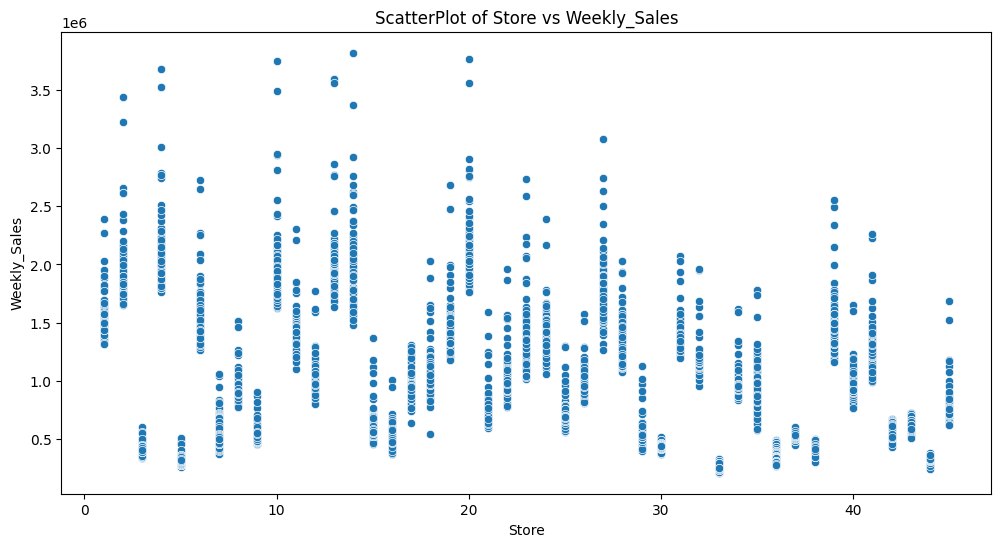

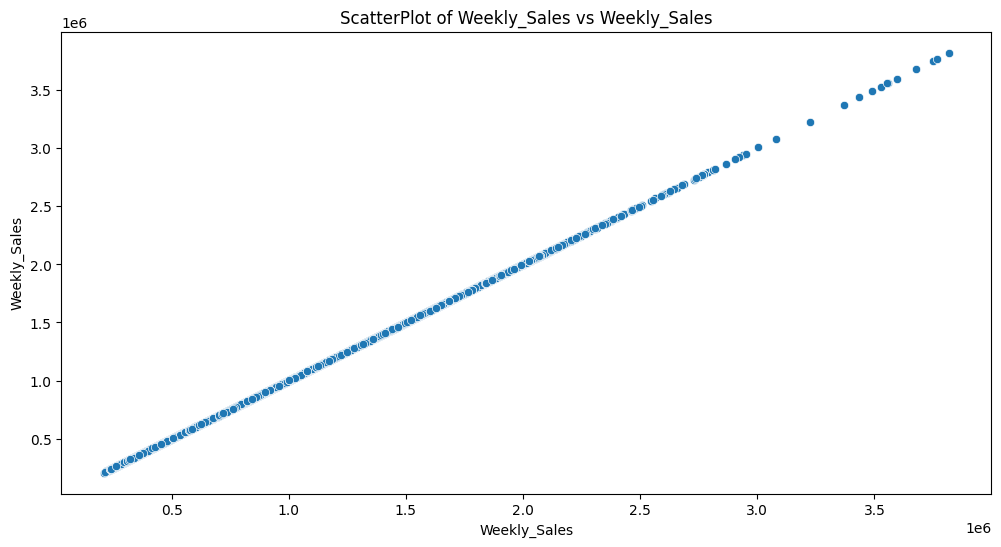

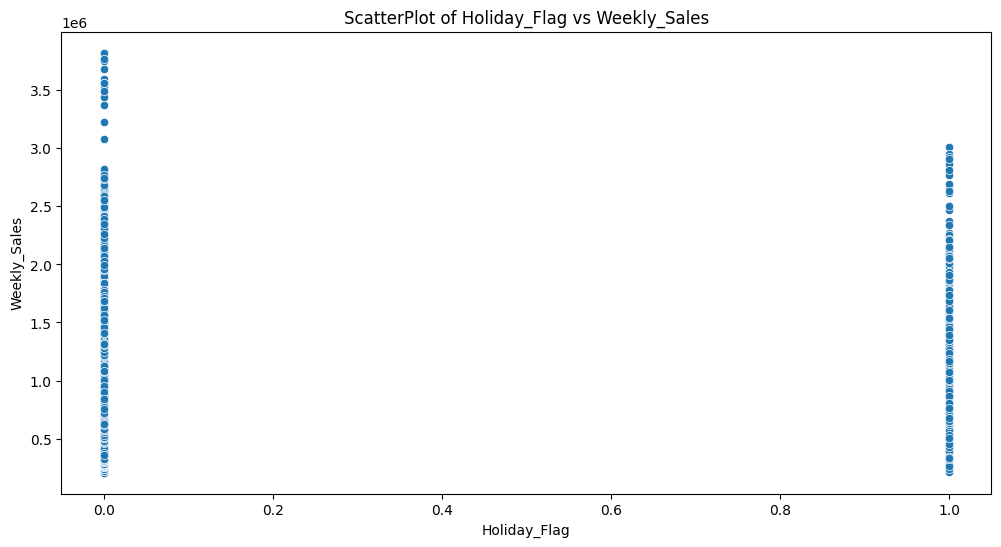

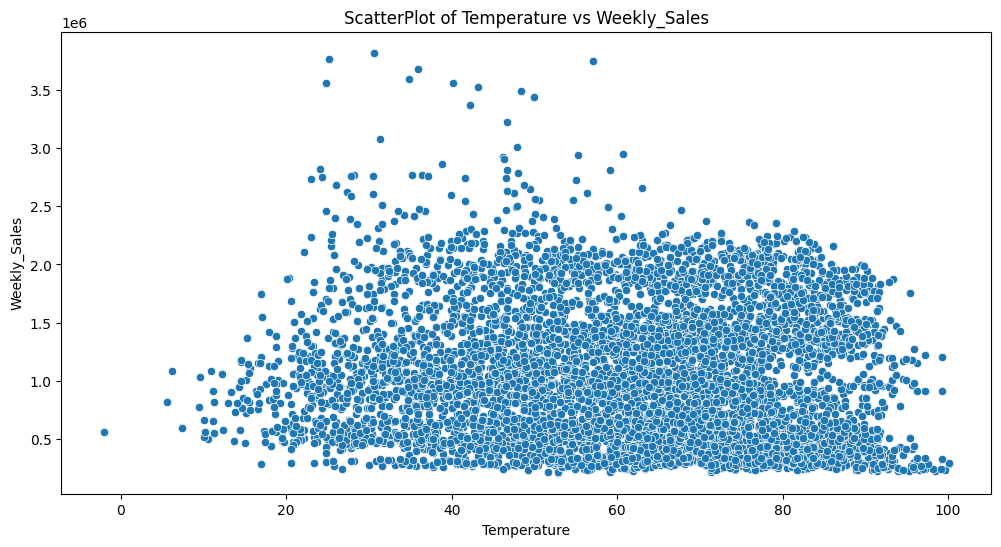

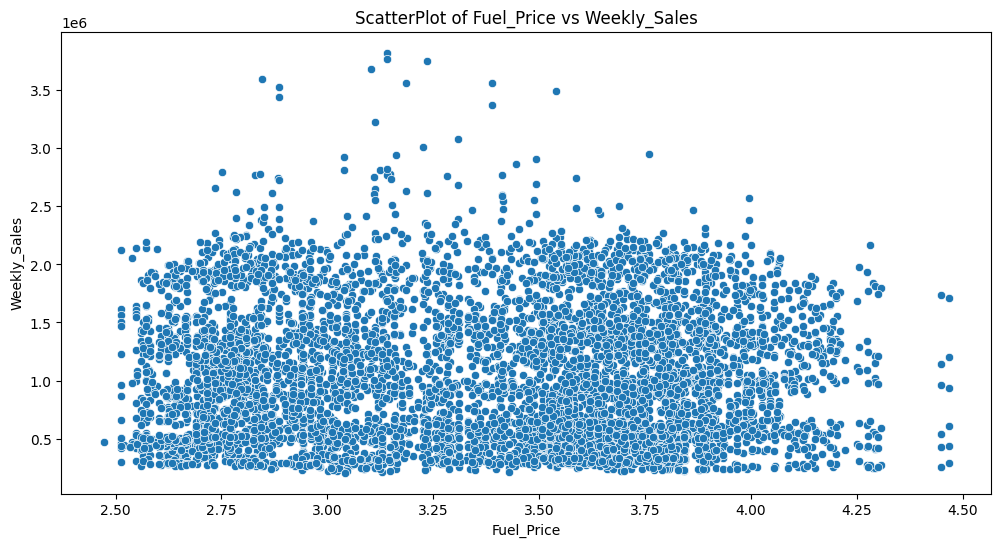

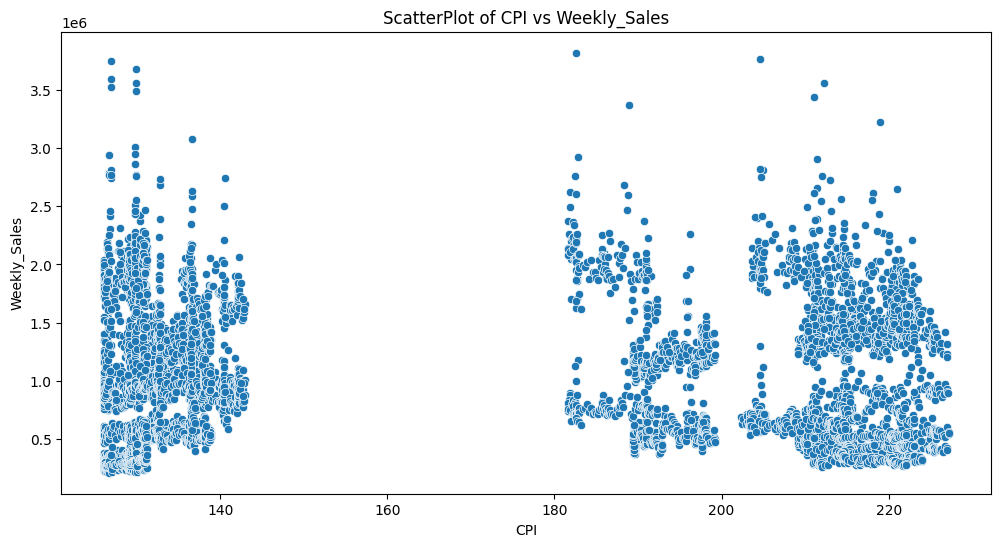

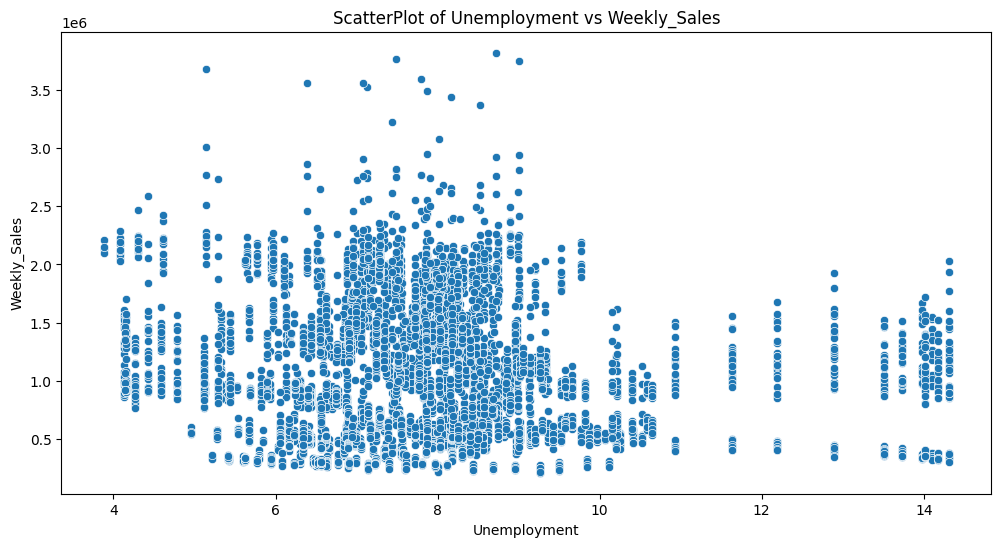

In [11]:
for i in con:
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=df,x=i,y='Weekly_Sales')
    plt.title(f'ScatterPlot of {i} vs Weekly_Sales')
    plt.show()

Separate X and Y

In [12]:
X=df[['CPI']]
X.head(2)

,CPI
0,211.096358
1,211.242170


In [13]:
Y=df[['Weekly_Sales']]
Y.head(2)

,Weekly_Sales
0,1643690.90
1,1641957.44


I donot see any linear regression between the data. lets try by using scikit 

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [15]:
model.score(X,Y)

0.005275721495278551

In [16]:
X=df[['Store']]
model.fit(X,Y)

LinearRegression()

In [17]:
model.score(X,Y)

0.11244756014500934

In [18]:
X=df[['Fuel_Price']]
model.fit(X,Y)

LinearRegression()

In [19]:
X=df[['Fuel_Price']]
model.fit(X,Y)

LinearRegression()

In [20]:
model.score(X,Y)

8.956325140618837e-05

## This data is not at all suitable for linear regression. Lets try forest regression

In [21]:
X=df[['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']]
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106


In [22]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_Y,val_Y=train_test_split(X,Y,random_state=0)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

forest_model=RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_Y)
val_pred=forest_model.predict(val_X)

print(mean_absolute_error(val_Y,val_pred))

76788.35040820384


In [24]:
r2_score(val_Y,val_pred)

0.9318544665995414

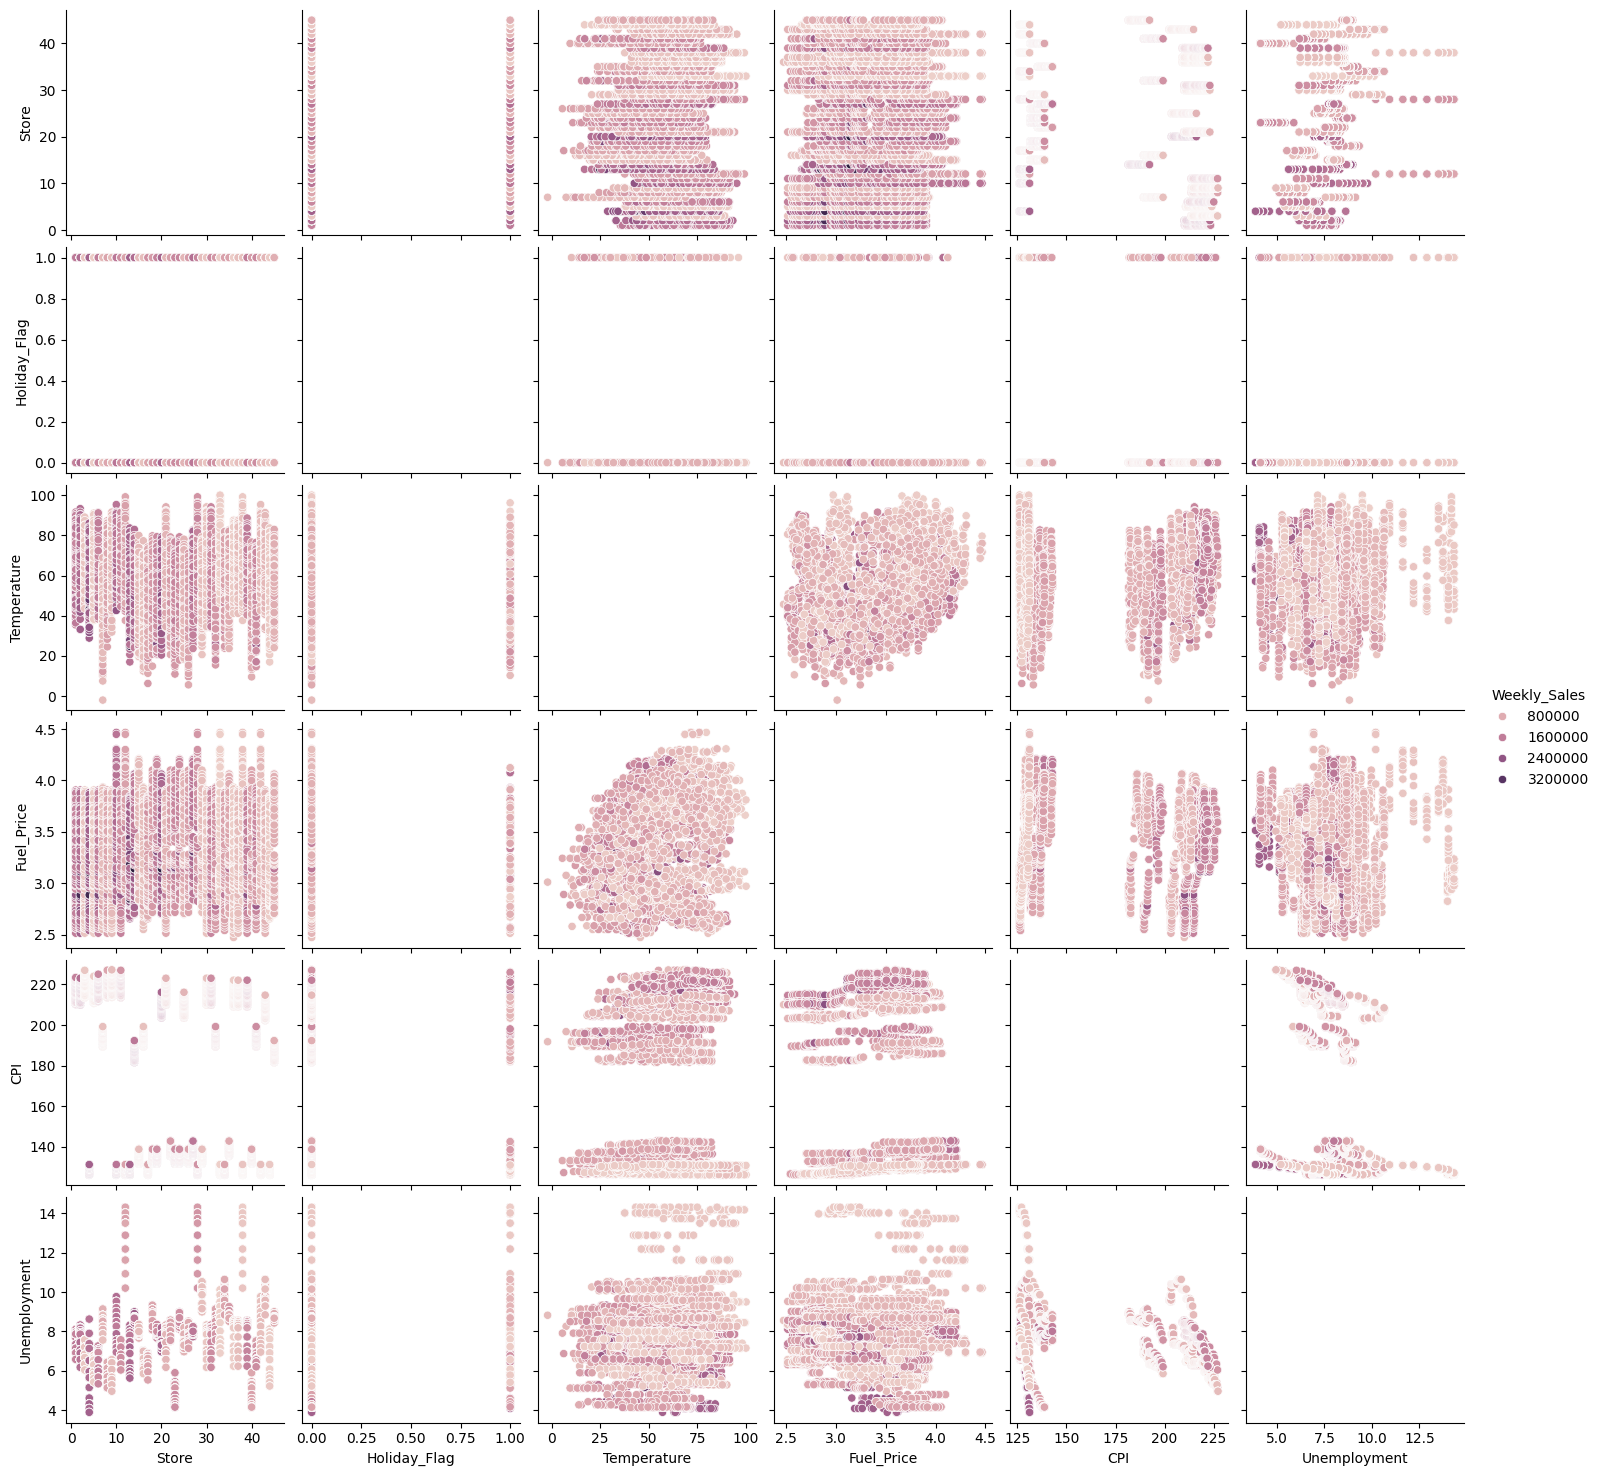

In [26]:
sns.pairplot(data=df,hue='Weekly_Sales')